# Example 4: query star catalog data from Vizier

(435) Ella / HIP 77369 event on 2020 Jun 09, 23:54 UT

Astrometric position with proper motion and parallax to date of event: RA: 15 47 37.6405  DE: -22 05 20.675

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier
from astropy.coordinates import Angle

In [3]:
# Which catalog columns do we want ?
v1 = Vizier(columns=['DR2Name','_RAJ2000', '_DEJ2000', 'Gmag'], column_filters={"Gmag":"<12"})
v2 = Vizier(columns=['HIP', '_RAJ2000','_DEJ2000', 'Vmag'])
v3 = Vizier(columns=['UCAC4','RAJ2000', 'DEJ2000', 'Vmag', 'Rmag'])
v4 = Vizier(columns=['SrcIDgaia','RAJ2000', 'DEJ2000', 'Gmag', 'Rmag'])

In [4]:
# Query position for star search
c = SkyCoord("15h47m37.6s","-22d05m21s", frame="icrs")
#c.to_string('hmsdms')

In [5]:
# Search radius in arcs
srad = 5

In [6]:
# Do the Vizier query
qres1 = v1.query_region(c, width=srad*u.arcsec, catalog="I/345/gaia2")
qres2 = v2.query_region(c, width=srad*u.arcsec, catalog="I/239/hip_main")
qres3 = v3.query_region(c, width=srad*u.arcsec, catalog="I/322A/out")
qres4 = v4.query_region(c, width=srad*u.arcsec, catalog="I/340/ucac5")

# How many hits do we have for each catalog ? Should be one for each catalog
print(len(qres1[0]),len(qres2[0]),len(qres3[0]),len(qres4[0]))

1 1 1 1


In [7]:
# Print the derived catalog data
print(qres1[0]); print("\n")
print(qres2[0]); print("\n")
print(qres3[0]); print("\n")
print(qres4[0]); print("\n")

          DR2Name                 _RAJ2000          _DEJ2000       Gmag 
                                    deg               deg          mag  
---------------------------- ----------------- ----------------- -------
Gaia DR2 6240616210127916928 236.9069932908804 -22.0890724701001 10.4348


 HIP     _RAJ2000       _DEJ2000     Vmag
           deg            deg        mag 
----- -------------- -------------- -----
77369 236.9070081501 -22.0890738267 11.01


  UCAC4      RAJ2000     DEJ2000    Vmag 
               deg         deg      mag  
---------- ----------- ----------- ------
340-076320 236.9069903 -22.0890709 11.584


     SrcIDgaia        RAJ2000     DEJ2000    Gmag   Rmag 
                        deg         deg      mag    mag  
------------------- ----------- ----------- ------ ------
6240616205830161792 236.9069992 -22.0890700 10.286 10.390




In [8]:
# Extract the coordinates
ra1,de1 = (qres1[0][0]['_RAJ2000'] ,qres1[0][0]['_DEJ2000'])
ra2,de2 = (qres2[0][0]['_RAJ2000'] ,qres2[0][0]['_DEJ2000'])
ra3,de3 = (qres3[0][0]['RAJ2000'] ,qres3[0][0]['DEJ2000'])
ra4,de4 = (qres4[0][0]['RAJ2000'] ,qres4[0][0]['DEJ2000'])

In [9]:
# Convert them to SkyCoord objects 
c1 = SkyCoord(ra1,de1, unit='deg', frame='icrs')
c2 = SkyCoord(ra2,de2, unit='deg', frame='icrs')
c3 = SkyCoord(ra3,de3, unit='deg', frame='icrs')
c4 = SkyCoord(ra4,de4, unit='deg', frame='icrs')

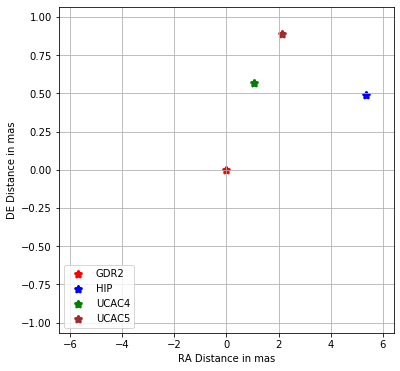

In [10]:
# Plot the  result
plt.rcParams['figure.figsize'] = 6,6

# Use Gaia DR2 position as center 
c = c1

c_ra = float(c.ra/u.deg)
c_de = float(c.dec/u.deg)

ra=np.asarray([ra1,ra2,ra3,ra4])
de=np.asarray([de1,de2,de3,de4])

x = 360000*np.sqrt((ra-c_ra)**2)
y = 360000*np.sqrt((de-c_de)**2)

plt.scatter(x[0],y[0], c='red', marker='*', lw=3, label='GDR2')
plt.scatter(x[1],y[1], c='blue', marker='*', lw=3, label='HIP')
plt.scatter(x[2],y[2], c='green', marker='*', lw=3, label='UCAC4')
plt.scatter(x[3],y[3], c='brown', marker='*', lw=3, label='UCAC5')
plt.ylim([-y.max()*1.2, y.max()*1.2])
plt.xlim([-x.max()*1.2, x.max()*1.2])

plt.grid()
plt.legend(loc='lower left')
plt.xlabel("RA Distance in mas")
plt.ylabel("DE Distance in mas")
plt.savefig("example_4.pdf")